In [5]:
import Augmentor
import keras
from keras.preprocessing.image import image, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K


In [6]:
p = Augmentor.Pipeline("data/train/")
#p.status()

Initialised with 172 image(s) found.
Output directory set to data/train/output.

In [7]:
p.rotate90(probability=0.05)
p.rotate270(probability=0.05)
p.flip_left_right(probability=0.08)
p.flip_top_bottom(probability=0.03)
p.crop_random(probability=1, percentage_area=0.95)
p.resize(probability=1.0, width=128, height=128)
p.greyscale(1.0)

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FC42407AF98>: 100%|██████████| 100/100 [00:03<00:00, 25.79 Samples/s]


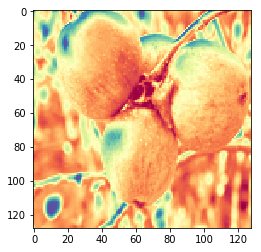

In [8]:
p.sample(100)
batch_size = 128
g = p.keras_generator(batch_size=batch_size)
images, labels = next(g)
plt.imshow(images[0].reshape(128, 128), cmap="Spectral");


In [17]:

input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [27]:
x_train =images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

In [34]:
autoencoder.fit(x_train_noisy, x_train, epochs=500, batch_size=128, shuffle=True,
                validation_split=0.33,verbose=1)


Train on 85 samples, validate on 43 samples
Epoch 1/500
85/85 [==============================] - 4s 47ms/step - loss: 2.8481 - val_loss: 2.0175
Epoch 2/500
85/85 [==============================] - 4s 46ms/step - loss: 2.0655 - val_loss: 1.5054
Epoch 3/500
85/85 [==============================] - 4s 46ms/step - loss: 1.5389 - val_loss: 1.1340
Epoch 4/500
85/85 [==============================] - 4s 50ms/step - loss: 1.1557 - val_loss: 0.8622
Epoch 5/500
85/85 [==============================] - 4s 53ms/step - loss: 0.8735 - val_loss: 0.7036
Epoch 6/500
85/85 [==============================] - 5s 57ms/step - loss: 0.7063 - val_loss: 0.6622
Epoch 7/500
85/85 [==============================] - 5s 57ms/step - loss: 0.6593 - val_loss: 0.6568
Epoch 8/500
85/85 [==============================] - 5s 54ms/step - loss: 0.6528 - val_loss: 0.6531
Epoch 9/500
85/85 [==============================] - 4s 49ms/step - loss: 0.6490 - val_loss: 0.6496
Epoch 10/500
85/85 [==============================] - 4s

Epoch 82/500
85/85 [==============================] - 5s 57ms/step - loss: 0.4900 - val_loss: 0.4926
Epoch 83/500
85/85 [==============================] - 5s 59ms/step - loss: 0.4921 - val_loss: 0.4903
Epoch 84/500
85/85 [==============================] - 5s 63ms/step - loss: 0.4894 - val_loss: 0.4920
Epoch 85/500
85/85 [==============================] - 5s 60ms/step - loss: 0.4915 - val_loss: 0.4898
Epoch 86/500
85/85 [==============================] - 5s 57ms/step - loss: 0.4889 - val_loss: 0.4915
Epoch 87/500
85/85 [==============================] - 5s 58ms/step - loss: 0.4909 - val_loss: 0.4894
Epoch 88/500
85/85 [==============================] - 5s 53ms/step - loss: 0.4884 - val_loss: 0.4909
Epoch 89/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4904 - val_loss: 0.4889
Epoch 90/500
85/85 [==============================] - 4s 49ms/step - loss: 0.4879 - val_loss: 0.4903
Epoch 91/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4897 - val_los

Epoch 163/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4710 - val_loss: 0.4726
Epoch 164/500
85/85 [==============================] - 5s 59ms/step - loss: 0.4705 - val_loss: 0.4719
Epoch 165/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4706 - val_loss: 0.4723
Epoch 166/500
85/85 [==============================] - 5s 53ms/step - loss: 0.4703 - val_loss: 0.4716
Epoch 167/500
85/85 [==============================] - 4s 52ms/step - loss: 0.4703 - val_loss: 0.4721
Epoch 168/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4700 - val_loss: 0.4713
Epoch 169/500
85/85 [==============================] - 4s 50ms/step - loss: 0.4700 - val_loss: 0.4717
Epoch 170/500
85/85 [==============================] - 5s 53ms/step - loss: 0.4696 - val_loss: 0.4709
Epoch 171/500
85/85 [==============================] - 4s 53ms/step - loss: 0.4696 - val_loss: 0.4714
Epoch 172/500
85/85 [==============================] - 4s 52ms/step - loss: 0.4693

Epoch 244/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4611 - val_loss: 0.4622
Epoch 245/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4606 - val_loss: 0.4635
Epoch 246/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4609 - val_loss: 0.4621
Epoch 247/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4604 - val_loss: 0.4634
Epoch 248/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4608 - val_loss: 0.4619
Epoch 249/500
85/85 [==============================] - 5s 53ms/step - loss: 0.4603 - val_loss: 0.4633
Epoch 250/500
85/85 [==============================] - 4s 50ms/step - loss: 0.4607 - val_loss: 0.4618
Epoch 251/500
85/85 [==============================] - 4s 48ms/step - loss: 0.4601 - val_loss: 0.4631
Epoch 252/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4605 - val_loss: 0.4616
Epoch 253/500
85/85 [==============================] - 4s 48ms/step - loss: 0.4599

Epoch 325/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4563 - val_loss: 0.4597
Epoch 326/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4570 - val_loss: 0.4580
Epoch 327/500
85/85 [==============================] - 4s 45ms/step - loss: 0.4562 - val_loss: 0.4596
Epoch 328/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4570 - val_loss: 0.4579
Epoch 329/500
85/85 [==============================] - 4s 51ms/step - loss: 0.4561 - val_loss: 0.4596
Epoch 330/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4569 - val_loss: 0.4579
Epoch 331/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4561 - val_loss: 0.4595
Epoch 332/500
85/85 [==============================] - 5s 54ms/step - loss: 0.4569 - val_loss: 0.4578
Epoch 333/500
85/85 [==============================] - 5s 55ms/step - loss: 0.4560 - val_loss: 0.4595
Epoch 334/500
85/85 [==============================] - 5s 59ms/step - loss: 0.4568

Epoch 406/500
85/85 [==============================] - 4s 49ms/step - loss: 0.4548 - val_loss: 0.4558
Epoch 407/500
85/85 [==============================] - 4s 50ms/step - loss: 0.4540 - val_loss: 0.4574
Epoch 408/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4548 - val_loss: 0.4557
Epoch 409/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4540 - val_loss: 0.4573
Epoch 410/500
85/85 [==============================] - 4s 51ms/step - loss: 0.4547 - val_loss: 0.4557
Epoch 411/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4539 - val_loss: 0.4573
Epoch 412/500
85/85 [==============================] - 4s 48ms/step - loss: 0.4547 - val_loss: 0.4557
Epoch 413/500
85/85 [==============================] - 4s 48ms/step - loss: 0.4539 - val_loss: 0.4573
Epoch 414/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4547 - val_loss: 0.4557
Epoch 415/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4539

Epoch 487/500
85/85 [==============================] - 4s 45ms/step - loss: 0.4525 - val_loss: 0.4559
Epoch 488/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4533 - val_loss: 0.4542
Epoch 489/500
85/85 [==============================] - 4s 50ms/step - loss: 0.4524 - val_loss: 0.4557
Epoch 490/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4531 - val_loss: 0.4541
Epoch 491/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4523 - val_loss: 0.4557
Epoch 492/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4530 - val_loss: 0.4541
Epoch 493/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4523 - val_loss: 0.4556
Epoch 494/500
85/85 [==============================] - 5s 53ms/step - loss: 0.4530 - val_loss: 0.4540
Epoch 495/500
85/85 [==============================] - 4s 46ms/step - loss: 0.4522 - val_loss: 0.4555
Epoch 496/500
85/85 [==============================] - 4s 47ms/step - loss: 0.4529

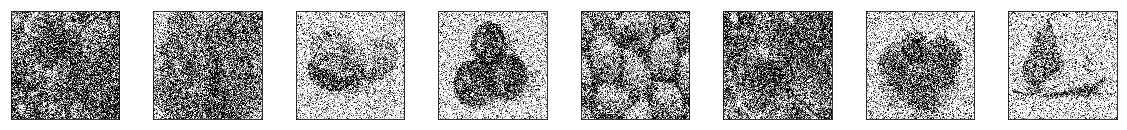

In [36]:
n = 8
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

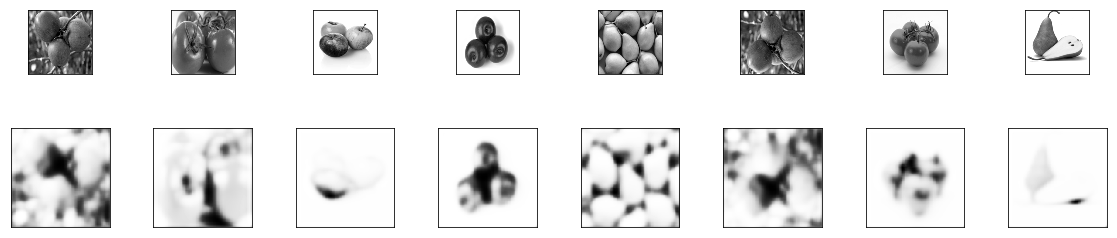

In [40]:
import warnings
warnings.filterwarnings("ignore")
decoded_imgs = autoencoder.predict(x_train)
n =8
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_train[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()